#### Importing necessary libraries


In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv('iris.data')

### Data cleaning and exploratory analysis


In [4]:
df.head()
df.columns=['s_length','s_width','p_length','p_width','class']
df.head()
df.dropna(inplace=True)
df.loc[df['class']==1]

,s_length,s_width,p_length,p_width,class


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   s_length  149 non-null    float64
 1   s_width   149 non-null    float64
 2   p_length  149 non-null    float64
 3   p_width   149 non-null    float64
 4   class     149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
x=LabelEncoder()
df['class']=x.fit_transform(df['class'])
species=['Iris-versicolor',
'Iris-virginica','Iris-setosa']  
df = df.apply(pd.to_numeric, errors='coerce')

In [8]:
a=df.corr()
a['class'].sort_values(ascending=False)
df['class'].astype(float)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
144    2.0
145    2.0
146    2.0
147    2.0
148    2.0
Name: class, Length: 149, dtype: float64

array([[<AxesSubplot:xlabel='s_length', ylabel='s_length'>,
        <AxesSubplot:xlabel='s_width', ylabel='s_length'>,
        <AxesSubplot:xlabel='p_length', ylabel='s_length'>,
        <AxesSubplot:xlabel='p_width', ylabel='s_length'>,
        <AxesSubplot:xlabel='class', ylabel='s_length'>],
       [<AxesSubplot:xlabel='s_length', ylabel='s_width'>,
        <AxesSubplot:xlabel='s_width', ylabel='s_width'>,
        <AxesSubplot:xlabel='p_length', ylabel='s_width'>,
        <AxesSubplot:xlabel='p_width', ylabel='s_width'>,
        <AxesSubplot:xlabel='class', ylabel='s_width'>],
       [<AxesSubplot:xlabel='s_length', ylabel='p_length'>,
        <AxesSubplot:xlabel='s_width', ylabel='p_length'>,
        <AxesSubplot:xlabel='p_length', ylabel='p_length'>,
        <AxesSubplot:xlabel='p_width', ylabel='p_length'>,
        <AxesSubplot:xlabel='class', ylabel='p_length'>],
       [<AxesSubplot:xlabel='s_length', ylabel='p_width'>,
        <AxesSubplot:xlabel='s_width', ylabel='p_width'>,


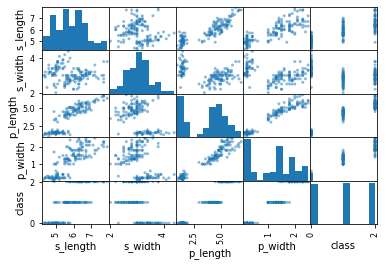

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)

In [10]:
X=np.array(df[['s_length','s_width','p_length','p_width']])
y=np.array(df['class'])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [12]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# clf=LinearRegression()
# clf=svm.SVC()
# clf=LogisticRegression()
# clf=KNeighborsClassifier()
clf=GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [13]:
acc=clf.score(X_test,y_test)
acc

0.9666666666666667

In [15]:
#0 2 1
to_predict=np.array([[6,4,2,0.5],[6.7,3,5.6,2.5],[5,2.4,3.3,-9999]])
predict=to_predict.reshape(len(to_predict),-1)
xyz=clf.predict(predict)
xyz

array([0, 2, 2])